In [46]:
import numpy as np
import scipy.signal 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import real_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum
from acoustics.cepstrum import minimum_phase

# 1. Waveform

In [47]:
#for rainbow.wav
fs, signal = scipy.io.wavfile.read('audio_files/data_input_rainbow.wav')

Text(0.5, 1.0, 'Waveform')

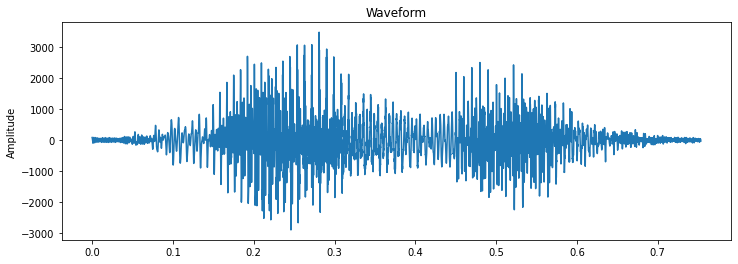

In [48]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
audio_length = len(signal)/fs 
timeaxis = np.linspace(0,audio_length,len(signal))

ax.plot(timeaxis, signal)
ax.set_ylabel('Amplitude')
ax.set_title('Waveform')

# 2. Cepstrum Plots

## 2.1 Complex_cepstrum

- Complex cepstrum is calculated by taking the inverse fourier transform of the log of the spectrum
- It contains information about the phase (imaginary part of the complex logarithm)

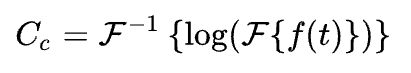

<ipython-input-49-7dfaaac1b625>:15: RuntimeWarning: invalid value encountered in log10
  ax[1].plot(quefrency_vector, 20*np.log10(ceps))


Text(0.5, 1.0, 'Complex_cepstrum in dB')

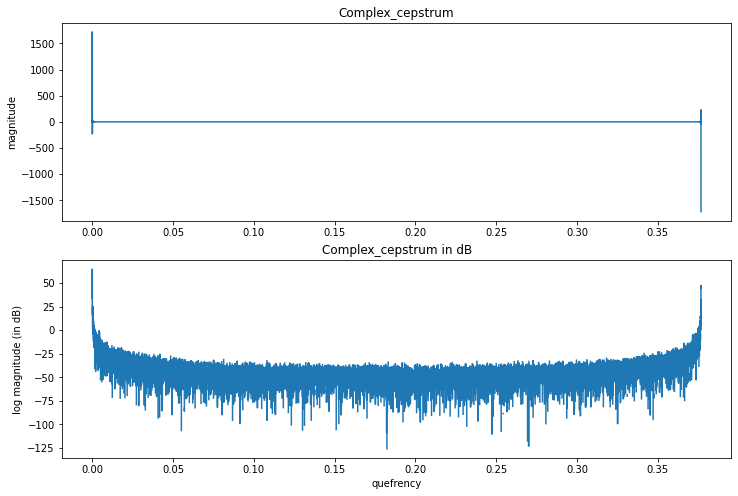

In [49]:
# complex_cepstrum
ceps, _ = complex_cepstrum(signal)

# quefrency
dt = 1/fs
freq_vector = np.fft.rfftfreq(len(signal), d=dt)
df = freq_vector[1] - freq_vector[0]
quefrency_vector = np.fft.rfftfreq(2*ceps.size-2, df)

# plot
fig, ax = plt.subplots(2,1, figsize=(12,8))
ax[0].plot(quefrency_vector, ceps)
ax[0].set_ylabel('magnitude')
ax[0].set_title('Complex_cepstrum')
ax[1].plot(quefrency_vector, 20*np.log10(ceps))
ax[1].set_xlabel('quefrency')
ax[1].set_ylabel('log magnitude (in dB)')
ax[1].set_title('Complex_cepstrum in dB')

## 2.2 Real_cepstrum

- Real cepstrum is calculated by taking the inverse fourier transform of the log of the <B> mod of the spectrum </B>
- It contains <B>no information about the phase </B>

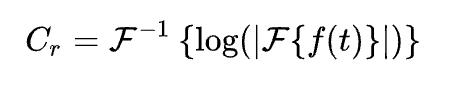

<ipython-input-50-0fbc39e34520>:15: RuntimeWarning: invalid value encountered in log10
  ax[1].plot(quefrency_vector, 20*np.log10(ceps))


Text(0.5, 1.0, 'Real_cepstrum in dB')

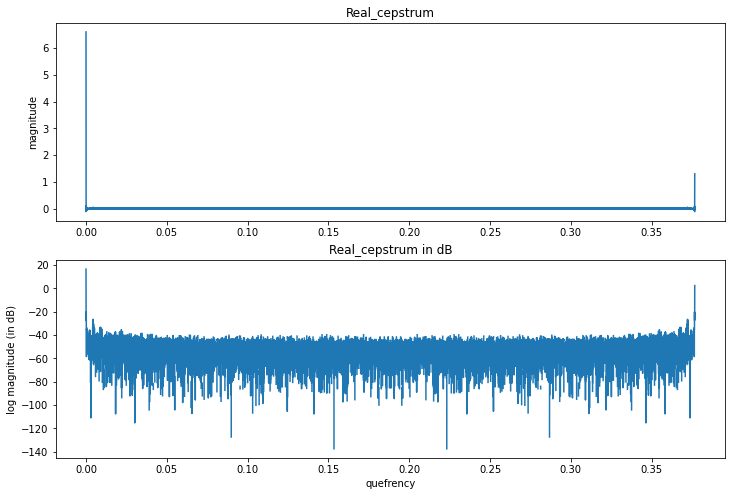

In [50]:
# real_cepstrum
ceps = real_cepstrum(signal)

# quefrency
dt = 1/fs
freq_vector = np.fft.rfftfreq(len(signal), d=dt)
df = freq_vector[1] - freq_vector[0]
quefrency_vector = np.fft.rfftfreq(2*ceps.size-2, df)

# plot
fig, ax = plt.subplots(2,1, figsize=(12,8))
ax[0].plot(quefrency_vector, ceps)
ax[0].set_ylabel('magnitude')
ax[0].set_title('Real_cepstrum')
ax[1].plot(quefrency_vector, 20*np.log10(ceps))
ax[1].set_xlabel('quefrency')
ax[1].set_ylabel('log magnitude (in dB)')
ax[1].set_title('Real_cepstrum in dB')


## 2.3 VFP Cepstrum

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'vfp cepstrum in dB')

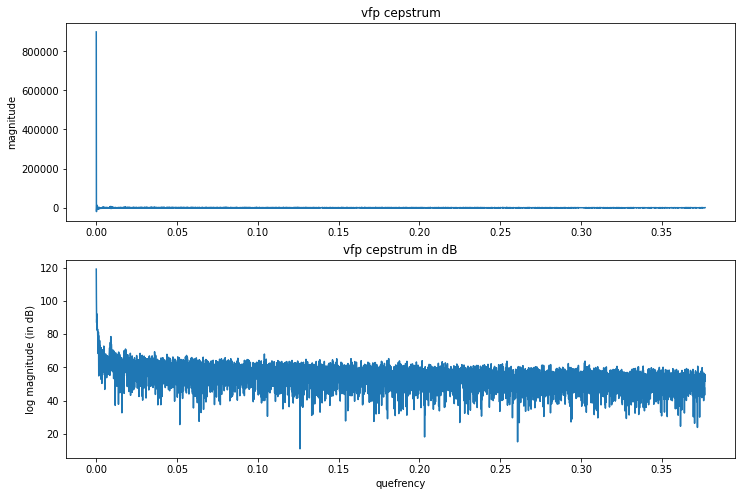

In [51]:
x = signal

x = np.hamming(len(x))*x
spectrum = np.fft.rfft(x)
spectrum = 20*np.log10(np.abs(spectrum))
ceps = np.fft.rfft(spectrum)

dt = 1/fs
freq_vector = np.fft.rfftfreq(len(signal), d=dt)
df = freq_vector[1] - freq_vector[0]
quefrency_vector = np.fft.rfftfreq(2*ceps.size-2, df)

fig, ax = plt.subplots(2,1, figsize=(12,8))
ax[0].plot(quefrency_vector, ceps)
ax[0].set_ylabel('magnitude')
ax[0].set_title('vfp cepstrum')
ax[1].plot(quefrency_vector, 20*np.log10(ceps))
ax[1].set_xlabel('quefrency')
ax[1].set_ylabel('log magnitude (in dB)')
ax[1].set_title('vfp cepstrum in dB')


## 2.4 Cepstrum

Used in the matlab implementation

<ipython-input-52-6883923b99d1>:17: RuntimeWarning: invalid value encountered in log10
  ax[1].plot(quefrency_vector, 20*np.log10(ceps))


Text(0.5, 1.0, 'Cepstrum in dB')

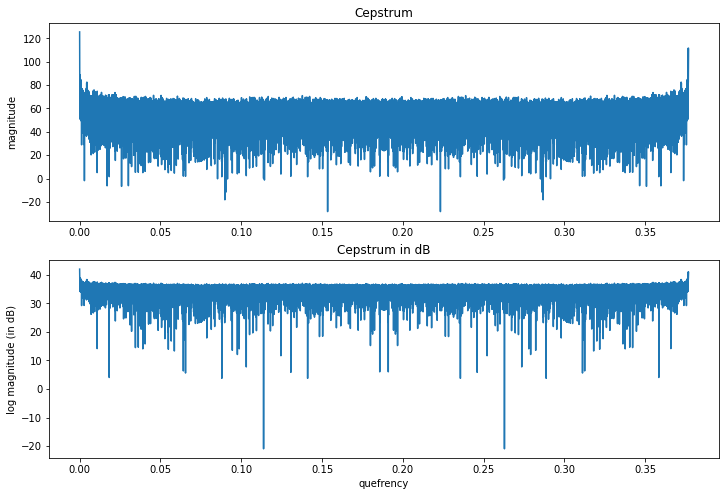

In [52]:
# cepstrum
SpecMat = np.abs(np.fft.fft(signal))
SpecdB = 20*np.log10(SpecMat)
ceps = 20*np.log10(np.abs(np.fft.fft(SpecdB)))

# quefrency
dt = 1/fs
freq_vector = np.fft.rfftfreq(len(signal), d=dt)
df = freq_vector[1] - freq_vector[0]
quefrency_vector = np.fft.rfftfreq(2*ceps.size-2, df)

# plot
fig, ax = plt.subplots(2,1, figsize=(12,8))
ax[0].plot(quefrency_vector, ceps)
ax[0].set_ylabel('magnitude')
ax[0].set_title('Cepstrum')
ax[1].plot(quefrency_vector, 20*np.log10(ceps))
ax[1].set_xlabel('quefrency')
ax[1].set_ylabel('log magnitude (in dB)')
ax[1].set_title('Cepstrum in dB')

# 3.  CPP plot function

In [53]:
# function for plotting cepstral peak prominence

def cpp_plot(x, fs, pitch_range, trendline_quefrency_range, cepstrum):
    
    # Cepstrum
    if cepstrum == 'complex_cepstrum':
        ceps, _ = complex_cepstrum(x)
    elif cepstrum == 'real_cepstrum':
        ceps = real_cepstrum(x)
    elif cepstrum == 'vfp':
        x = np.hamming(len(x))*x
        spectrum = np.fft.rfft(x)
        spectrum = 20*np.log10(np.abs(spectrum))
        ceps = np.fft.rfft(spectrum) 
    elif cepstrum == 'cepstrum':
        spectrum = np.fft.fft(x)
        spectrum = 20*np.log10(np.abs(spectrum))
        ceps = np.fft.fft(spectrum) 
    ceps = 20*np.log10(np.abs(ceps))

    # Quefrency
    dt = 1/fs
    freq_vector = np.fft.rfftfreq(len(x), d=dt)
    df = freq_vector[1] - freq_vector[0]
    quefrency_vector = np.fft.rfftfreq(2*ceps.size-2, df)
    
    # Selecting part of cepstrum
    quefrency_range = [1/pitch_range[1], 1/pitch_range[0]]
    index_range = np.where((quefrency_vector >= quefrency_range[0]) & (quefrency_vector <=quefrency_range[1]))

    # For trend line
    index_range_tl = np.where((quefrency_vector >= trendline_quefrency_range[0]) & (quefrency_vector <=trendline_quefrency_range[1]))
    plot_range = np.where((quefrency_vector >= 0) & (quefrency_vector <= 0.0512))
    
    # Linear regression
    linear_regressor = LinearRegression()  
    linear_regressor.fit(quefrency_vector[index_range_tl].reshape(-1, 1), ceps[index_range_tl].reshape(-1, 1))  
    Y_pred = linear_regressor.predict(quefrency_vector.reshape(-1, 1))  
    
    peak_value = np.max(ceps[index_range])
    peak_index = np.argmax(ceps[index_range])

    fig, ax = plt.subplots(1,1, figsize=(12,8))
    ax.plot(quefrency_vector[plot_range], ceps[plot_range])
    ax.plot(quefrency_vector[plot_range], Y_pred[plot_range])
    
    ax.plot(quefrency_vector[index_range][peak_index], peak_value, marker="o",markeredgecolor="red", markerfacecolor="red")
    ax.plot(quefrency_vector[index_range][peak_index], Y_pred[index_range][peak_index], marker="o", markeredgecolor="red", markerfacecolor="red")
    ax.set_xlabel('quefrency[s]')
    ax.set_ylabel('log magnitude(dB)')
    ax.set_title('Cepstrum')
    
    print('The peak is found at quefrency {}s and its value is {}'.format(np.round(quefrency_vector[index_range][peak_index], 5), np.round(peak_value, 5)))
    print('The trendline value at this quefrency is {}'.format(np.round(Y_pred[index_range][peak_index][0], 5)))
    print('The CPP is {} dB'.format(np.round(peak_value - Y_pred[index_range][peak_index][0], 5)))
    


# 4 CPP Plots

## 4.1 Complex cepstrum

The peak is found at quefrency 0.00431s and its value is -0.55603
The trendline value at this quefrency is -24.06195
The CPP is 23.50592 dB


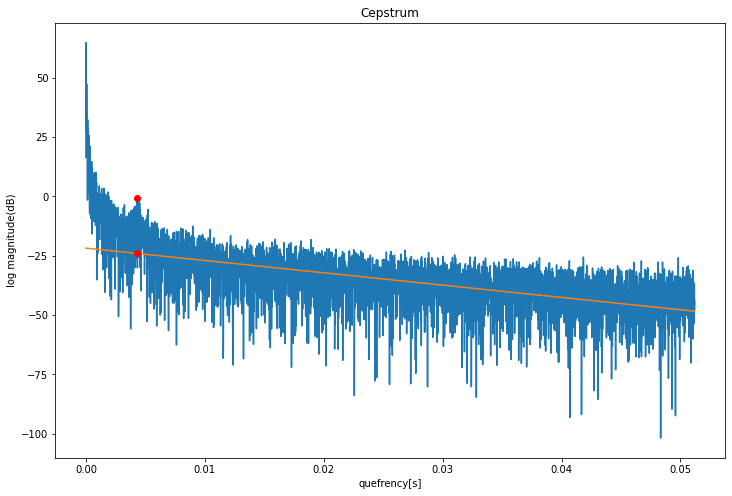

In [54]:
fs, signal = scipy.io.wavfile.read('audio_files/data_input_rainbow.wav')
cpp_plot(x=signal, fs=fs, pitch_range=[60, 333.3], trendline_quefrency_range=[0.001, 0.05], cepstrum = 'complex_cepstrum')


## 4.2 Real cepstrum

The peak is found at quefrency 0.00448s and its value is -26.59328
The trendline value at this quefrency is -48.44873
The CPP is 21.85545 dB


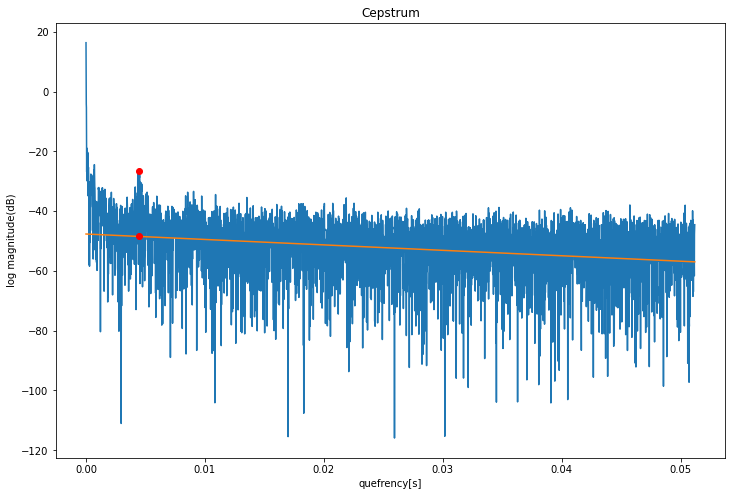

In [55]:
cpp_plot(x=signal, fs=fs, pitch_range=[60, 333.3], trendline_quefrency_range=[0.001, 0.05], cepstrum = 'real_cepstrum')


## 4.3 VFP cepstrum

The peak is found at quefrency 0.00907s and its value is 78.54759
The trendline value at this quefrency is 63.05206
The CPP is 15.49553 dB


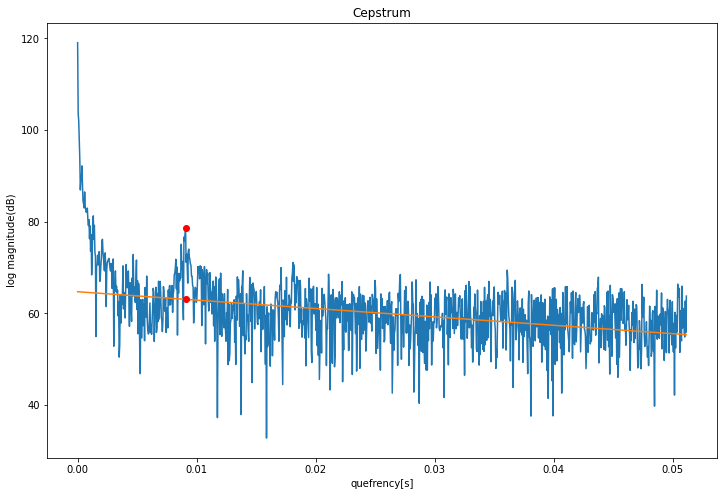

In [56]:
cpp_plot(x=signal, fs=fs, pitch_range=[60, 333.3], trendline_quefrency_range=[0.001, 0.05], cepstrum = 'vfp')


## 4.4 Cepstrum

The peak is found at quefrency 0.00448s and its value is 82.61204
The trendline value at this quefrency is 60.75659
The CPP is 21.85545 dB


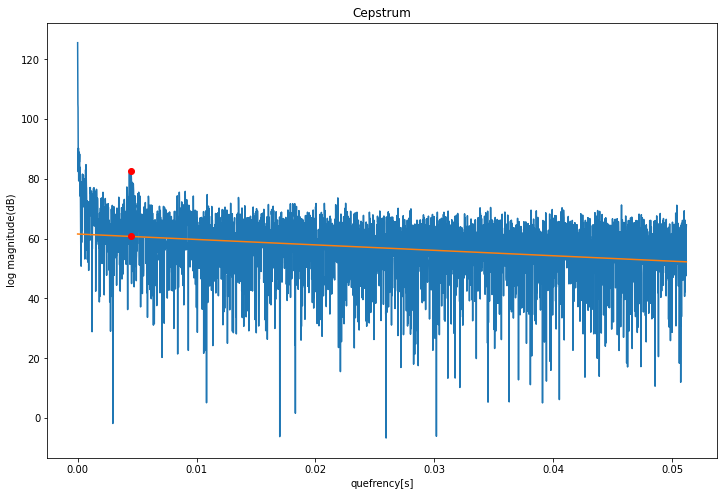

In [57]:
cpp_plot(x=signal, fs=fs, pitch_range=[60, 333.3], trendline_quefrency_range=[0.001, 0.05], cepstrum = 'cepstrum')


# 5. Summary

<B>1. Waveform plot </B>

<B>2. Cepstrum Plots </B>
- Complex_cepstrum
- Real_cepstrum
- VFP cepstrum
- Cepstrum

<B>3. CPP plot function </B>

<B>4. CPP plots for rainbow.wav </B>
- Complex_cepstrum
- Real_cepstrum
- VFP cepstrum
- Cepstrum
